In [221]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File to Load
global_footprint_data = Path("data/Global Ecological Footprint 2023.csv")


# Read data file and store into Pandas DataFrames
global_df = pd.read_csv(global_footprint_data, encoding="ISO-8859-1")
global_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [222]:
global_df.count()

Country                                     182
Region                                      182
SDGi                                        159
Life Exectancy                              176
HDI                                         173
Per Capita GDP                              165
Income Group                                178
Population (millions)                       182
Cropland Footprint                          152
Grazing Footprint                           152
Forest Product Footprint                    152
Carbon Footprint                            152
Fish Footprint                              152
Built up land                               152
Total Ecological Footprint (Consumption)    181
Cropland                                    152
Grazing land                                152
Forest land                                 152
Fishing ground                              152
Built up land.1                             152
Total biocapacity                       

In [223]:
# set up a connection with the sql database
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import inspect

In [224]:
engine = create_engine("sqlite:///data/global_ecological_footprint.sqlite")

In [225]:
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [226]:
global_df.to_sql('Global Ecological Footprint 2023', engine, if_exists='replace', index=False)

182

In [227]:
Base.classes.keys()

[]

In [228]:
global_df1 = pd.read_sql_table('Global Ecological Footprint 2023', con=engine)

In [229]:
global_df1.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,None,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,None,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [230]:
## get rid of records with empty values
global_df.dropna(inplace=True)
print(global_df)

                      Country                    Region  SDGi Life Exectancy  \
1                     Albania              Other Europe  71.6             76   
2                     Algeria                    Africa  71.5             76   
3                      Angola                    Africa  50.9             62   
5                   Argentina             South America  72.8             75   
6                     Armenia  Middle East/Central Asia  71.1             72   
..                        ...                       ...   ...            ...   
171      United Arab Emirates  Middle East/Central Asia  68.8             79   
172            United Kingdom              Other Europe  80.6             81   
173  United States of America             North America  74.6             76   
178                  Viet Nam              Asia-Pacific  72.8             74   
179                     Yemen  Middle East/Central Asia  52.1             64   

      HDI Per Capita GDP Income Group P

In [231]:
# check there are no remaining empty values
global_df.notnull()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
172,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
173,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
178,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [232]:
global_df.dtypes

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [233]:
# check the number of entries and data types for the data set
global_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1 to 179
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   134 non-null    object 
 1   Region                                    134 non-null    object 
 2   SDGi                                      134 non-null    object 
 3   Life Exectancy                            134 non-null    object 
 4   HDI                                       134 non-null    object 
 5   Per Capita GDP                            134 non-null    object 
 6   Income Group                              134 non-null    object 
 7   Population (millions)                     134 non-null    object 
 8   Cropland Footprint                        134 non-null    float64
 9   Grazing Footprint                         134 non-null    float64
 10  Forest Product Footprint                  1

In [234]:
# Generate summary statistics
global_df.describe()

,Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.608955,0.281343,0.445522,1.625373,0.157463,0.089552,3.211940,0.535821,0.397761,1.656962,0.443287,0.092887,3.133323,-0.077394,2.125999,2.850725
std,0.355930,0.454248,0.590987,1.848946,0.460855,0.095986,2.399719,0.567729,0.820917,6.148124,0.938406,0.089529,6.996981,7.079078,1.589923,5.451974
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.041945
25%,0.300000,0.100000,0.200000,0.300000,0.000000,0.000000,1.200000,0.200000,0.100000,0.074974,0.026401,0.042978,0.713313,-1.846930,0.811330,0.841216
50%,0.500000,0.200000,0.200000,1.000000,0.100000,0.100000,2.550000,0.400000,0.100000,0.355578,0.105093,0.067299,1.434456,-0.560412,1.658439,1.753833
75%,0.800000,0.300000,0.600000,2.350000,0.175000,0.100000,4.300000,0.600000,0.300000,1.222346,0.306486,0.116083,2.877529,0.241413,2.838688,2.518171
max,1.900000,4.700000,4.300000,11.600000,5.100000,0.500000,13.100000,2.800000,6.800000,67.949961,6.479269,0.541117,74.838452,71.699357,8.691697,55.106187


In [235]:
# Plot your data to see what's in your DataFrame
global_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [236]:
#checking columns
global_df.columns

Index(['Country', 'Region', 'SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP',
       'Income Group', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required'],
      dtype='object')

In [237]:
print(global_df.dtypes)

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [238]:
# Remove $ and commas, handling possible issues with non-numeric values
global_df['Per Capita GDP'] = global_df['Per Capita GDP'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert to numeric type, coercing errors to NaN
global_df['Per Capita GDP'] = pd.to_numeric(global_df['Per Capita GDP'], errors='coerce')

# Display modified DataFrame
print("\nModified DataFrame:")
print(global_df)


Modified DataFrame:
                      Country                    Region  SDGi Life Exectancy  \
1                     Albania              Other Europe  71.6             76   
2                     Algeria                    Africa  71.5             76   
3                      Angola                    Africa  50.9             62   
5                   Argentina             South America  72.8             75   
6                     Armenia  Middle East/Central Asia  71.1             72   
..                        ...                       ...   ...            ...   
171      United Arab Emirates  Middle East/Central Asia  68.8             79   
172            United Kingdom              Other Europe  80.6             81   
173  United States of America             North America  74.6             76   
178                  Viet Nam              Asia-Pacific  72.8             74   
179                     Yemen  Middle East/Central Asia  52.1             64   

      HDI  Per Cap

In [239]:
#replace [\,,] in Population (millions)
#global_df['Population (millions)']=global_df['Population (millions)'].replace('[\,,]','', regex=True)
global_df['Population (millions)']=global_df['Population (millions)'].replace('[\,,]','', regex=True)
print(global_df)

                      Country                    Region  SDGi Life Exectancy  \
1                     Albania              Other Europe  71.6             76   
2                     Algeria                    Africa  71.5             76   
3                      Angola                    Africa  50.9             62   
5                   Argentina             South America  72.8             75   
6                     Armenia  Middle East/Central Asia  71.1             72   
..                        ...                       ...   ...            ...   
171      United Arab Emirates  Middle East/Central Asia  68.8             79   
172            United Kingdom              Other Europe  80.6             81   
173  United States of America             North America  74.6             76   
178                  Viet Nam              Asia-Pacific  72.8             74   
179                     Yemen  Middle East/Central Asia  52.1             64   

      HDI  Per Capita GDP Income Group 

<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:3: SyntaxWarning: invalid escape sequence '\,'
/var/folders/fs/__bdqblj65l1mfg08j7wgfwh0000gp/T/ipykernel_42555/1659754604.py:3: SyntaxWarning: invalid escape sequence '\,'
  global_df['Population (millions)']=global_df['Population (millions)'].replace('[\,,]','', regex=True)


In [218]:
# convert Population (millions to float64
global_df['Population (millions)'] = global_df['Population (millions)'].astype('float64')

In [240]:
# convert Life Exectancy to a float64
#global_df['Life Exectancy'] = global_df['Life Exectancy'].astype('float')

ValueError: could not convert string to float: ' '

In [ ]:
global_df.dtypes

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                              float64
HDI                                          object
Per Capita GDP                              float64
Income Group                                 object
Population (millions)                       float64
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [ ]:
global_df[30:50]

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
30,Colombia,South America,70.1,73.0,0.75,15610.0,UM,51.5,0.6,0.7,...,2.0,0.5,1.1,1.895293,0.063673,0.066788,3.587635,1.610521,1.309160,0.551091
31,Congo,Africa,52.3,64.0,0.57,3921.0,LM,5.8,0.3,0.1,...,1.1,0.2,2.3,5.078504,0.259849,0.061983,7.831302,6.712954,0.740522,0.142805
32,"Congo, Democratic Republic of",Africa,50,59.0,0.48,1127.0,LI,95.2,0.2,0.0,...,0.7,0.2,0.2,1.348660,0.031009,0.081315,1.846246,1.160857,0.453836,0.371234
33,Costa Rica,Central America/Caribbean,73.8,77.0,0.81,20976.0,UM,5.2,0.4,0.1,...,2.6,0.3,0.3,0.643532,0.111496,0.251434,1.615102,-0.983839,1.720907,1.609150
34,Croatia,Other Europe,78.8,76.0,0.86,31007.0,HI,4.1,0.8,0.2,...,3.7,0.7,0.2,1.163262,0.360783,0.155073,2.571672,-1.140193,2.457838,1.443366
35,Czech Republic,EU-27,80.5,77.0,0.89,40707.0,HI,10.7,1.0,0.3,...,5.1,1.1,0.1,1.242041,0.005852,0.122171,2.522006,-2.561014,3.365758,2.015467
36,Denmark,EU-27,85.6,81.0,0.95,59333.0,HI,5.8,1.9,0.4,...,7.3,1.8,0.0,0.394444,1.753242,0.216036,4.216546,-3.069923,4.824788,1.728066
37,Djibouti,Africa,50.3,62.0,0.51,5710.0,LM,1.0,1.6,0.1,...,2.5,0.0,0.2,0.001715,0.234447,0.214843,0.633920,-1.823462,1.627173,3.876486
38,Dominican Republic,Central America/Caribbean,70.8,73.0,0.77,20541.0,UM,11.1,0.5,0.1,...,1.8,0.3,0.1,0.157583,0.022516,0.111284,0.681747,-1.121494,1.194030,2.645029
39,El Salvador,Central America/Caribbean,69.6,71.0,0.68,9062.0,LM,6.6,0.4,0.2,...,2.0,0.2,0.1,0.087975,0.112063,0.133306,0.605743,-1.346899,1.292956,3.223546


In [252]:
# global_df[34:37]


global_df.drop(global_df.index[[34,36]], inplace=True)
global_df[34:37]

global_df.reset_index(drop=True, inplace=True)
global_df

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62,0.59,6304.0,LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75,0.84,22117.0,UM,46,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72,0.76,13548.0,LM,3,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847
5,Australia,Asia-Pacific,75.6,83,0.95,53053.0,HI,26.1,0.1,0.5,...,5.8,1.8,4.5,1.861992,2.827503,0.024587,11.021401,5.244362,3.825307,0.524166
6,Austria,EU-27,82.3,81,0.92,55460.0,HI,9.1,1.0,0.3,...,5.6,0.6,0.1,1.952260,0.005609,0.194413,2.893775,-2.732866,3.725721,1.944395
7,Azerbaijan,Middle East/Central Asia,73.5,69,0.75,14692.0,UM,10.3,0.8,0.2,...,2.4,0.6,0.2,0.103819,0.014092,0.045343,0.936955,-1.420134,1.560763,2.515692
8,Bahrain,Middle East/Central Asia,64.3,79,0.88,49184.0,HI,1.8,0.5,0.4,...,8.2,0.0,0.0,0.000851,0.418959,0.128778,0.555726,-7.620475,5.413931,14.712646
9,Bangladesh,Asia-Pacific,64.2,72,0.66,5681.0,LI,167.9,0.2,0.0,...,0.7,0.1,0.0,0.004830,0.048881,0.065360,0.247818,-0.422907,0.444125,2.706519


In [253]:
c = global_df["Life Exectancy"]
c.value_counts(" ")

Life Exectancy
83    0.068182
72    0.068182
74    0.068182
73    0.060606
76    0.053030
62    0.045455
70    0.045455
59    0.045455
75    0.045455
64    0.045455
66    0.037879
81    0.037879
69    0.037879
79    0.037879
77    0.030303
68    0.030303
82    0.030303
60    0.022727
67    0.022727
61    0.022727
65    0.022727
71    0.022727
78    0.015152
84    0.015152
53    0.015152
63    0.015152
55    0.015152
54    0.007576
57    0.007576
80    0.007576
Name: proportion, dtype: float64

In [254]:
global_df['Life Exectancy'].str.strip()


0      76
1      76
2      62
3      75
4      72
5      83
6      81
7      69
8      79
9      72
10     78
11     72
12     82
13     70
14     60
15     72
16     64
17     75
18     61
19     73
20     75
21     72
22     59
23     62
24     60
25     83
26     54
27     53
28     79
29     78
30     73
31     64
32     59
33     77
34     76
35     77
36     81
37     62
38     73
39     71
40     77
41     57
42     65
43     67
44     82
45     82
46     66
47     62
48     72
49     81
50     64
51     80
52     69
53     59
54     63
55     74
56     67
57     68
58     74
59     70
60     82
61     83
62     83
63     71
64     84
65     74
66     70
67     61
68     84
69     79
70     72
71     68
72     73
73     61
74     74
75     83
76     64
77     63
78     75
79     59
80     64
81     70
82     71
83     74
84     74
85     59
86     66
87     59
88     68
89     74
90     62
91     53
92     83
93     73
94     66
95     76
96     65
97     70
98     72
99     69


In [255]:
# Set the display options to show more rows
pd.set_option('display.max_rows', 179)  # Adjust the number as needed

# Display your DataFrame
global_df

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62,0.59,6304.0,LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75,0.84,22117.0,UM,46,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72,0.76,13548.0,LM,3,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847
5,Australia,Asia-Pacific,75.6,83,0.95,53053.0,HI,26.1,0.1,0.5,...,5.8,1.8,4.5,1.861992,2.827503,0.024587,11.021401,5.244362,3.825307,0.524166
6,Austria,EU-27,82.3,81,0.92,55460.0,HI,9.1,1.0,0.3,...,5.6,0.6,0.1,1.952260,0.005609,0.194413,2.893775,-2.732866,3.725721,1.944395
7,Azerbaijan,Middle East/Central Asia,73.5,69,0.75,14692.0,UM,10.3,0.8,0.2,...,2.4,0.6,0.2,0.103819,0.014092,0.045343,0.936955,-1.420134,1.560763,2.515692
8,Bahrain,Middle East/Central Asia,64.3,79,0.88,49184.0,HI,1.8,0.5,0.4,...,8.2,0.0,0.0,0.000851,0.418959,0.128778,0.555726,-7.620475,5.413931,14.712646
9,Bangladesh,Asia-Pacific,64.2,72,0.66,5681.0,LI,167.9,0.2,0.0,...,0.7,0.1,0.0,0.004830,0.048881,0.065360,0.247818,-0.422907,0.444125,2.706519


In [250]:
# convert Life Exectancy from object to float
global_df['Life Exectancy'] = pd.to_numeric(global_df['Life Exectancy'])


ValueError: Unable to parse string " " at position 34

In [177]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = global_df['Number of Earths required']

# Separate the X variable, the features
X =global_df.drop(columns=['Per Capita GDP', 'Country', 'Region', 'SDGi', 'HDI', 'Income Group',
                            'Total Ecological Footprint (Consumption)', 'Ecological (Deficit) or Reserve',
                             'Number of Earths required', 'Number of Countries required'])

In [116]:
import seaborn as sb

#sb.pairplot(root_df)

In [117]:
# #If keeping and keeping seaborn, put this cell above the seaborn cell (to define root_df)
# import numpy as np

# root_df = np.sqrt(X)
# root_df.head()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable sqrt method

In [148]:
X.head()

,Life Exectancy,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity
0,76,2.9,0.8,0.2,0.2,0.7,0.0,0.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752
1,76,45.4,0.7,0.2,0.1,1.2,0.0,0.0,0.4,0.2,0.023912,0.007179,0.037775,0.663375
2,62,35.0,0.2,0.1,0.1,0.3,0.1,0.1,0.2,0.8,0.416888,0.153499,0.061360,1.588191
3,75,46.0,0.9,0.5,0.2,1.4,0.1,0.1,1.8,1.2,0.591673,1.527615,0.083517,5.231663
4,72,3.0,0.7,0.2,0.3,1.1,0.0,0.1,0.4,0.3,0.098200,0.016853,0.052182,0.846625


In [149]:
cols = X.columns
cols

Index(['Life Exectancy', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity '],
      dtype='object')

In [150]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
global_df_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=cols)


In [151]:
global_df_scaled.head()

,Life Exectancy,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity
0,0.642101,-0.289735,0.534324,-0.184649,-0.422257,-0.509333,-0.344081,0.110090,0.111671,-0.242833,-0.236071,-0.390148,-0.227170,-0.283121
1,0.642101,-0.054781,0.253325,-0.184649,-0.591160,-0.239108,-0.344081,-0.927898,-0.239294,-0.242833,-0.268398,-0.469018,-0.619645,-0.356263
2,-1.147647,-0.112276,-1.151671,-0.404231,-0.591160,-0.725512,-0.127802,0.110090,-0.590259,0.485667,-0.204692,-0.313516,-0.356907,-0.224503
3,0.514262,-0.051464,0.815324,0.474098,-0.422257,-0.131018,-0.127802,0.110090,2.217458,0.971334,-0.176358,1.146838,-0.110069,0.294587
4,0.130745,-0.289183,0.253325,-0.184649,-0.253354,-0.293153,-0.344081,0.110090,-0.239294,-0.121417,-0.256355,-0.458738,-0.459151,-0.330155


In [ ]:
# # Review the y variable Series
# y[:134]

# y_df = pd.DataFrame(y)
# #y_df.value_counts()

# y_df.isnull()
# y_df[34:37]

In [ ]:
# #manually drop rows 34 and 36 which contain the NaNs
# y_df2 = y_df.drop(y_df.index[[34,36]])

# y_df2.reset_index(drop=True, inplace=True)
# y_df2

In [ ]:
# # Trying to find where the NaN value is located in the global_df.
# global_df.isna().any(axis=1)

# # Set the display options to show more rows
# #pd.set_option('display.max_rows', 134)  # Adjust the number as needed

# # Display your DataFrame
# global_df.head()

In [152]:
# Review the X variable DataFrame
print(X.shape)
print(y.shape)


(132, 14)
(132,)


In [153]:
#Import train test split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(99, 14)
(99,)
(33, 14)
(33,)


In [ ]:
#Scikit Linear Regression - wrong rabbit hole?
#sklearn.linear_model.LinearRegression(X_train. y_train, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)[source]


In [ ]:
# # drop NaN from Per Capita GDP
# global_df.dropna(subset=['Per Capita GDP'], inplace=True)
# print(global_df)

In [154]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)



LinearRegression()

In [155]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred.shape

(33,)

In [156]:
# # The coefficients
print("Coefficients: \n", regr.coef_)
# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-1.17401101e-03  1.77443777e-05  6.62942190e-01  6.34073010e-01
  6.44133483e-01  6.61761516e-01  6.54366985e-01  2.76117924e-01
 -2.10183663e-01 -1.88417453e-01 -2.11136228e-01 -2.14224663e-01
  2.36436187e-01  2.12758731e-01]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [157]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(33, 14)
(33,)
(33,)


In [158]:
print(X_test["Carbon Footprint"])

75      8.0
35      2.8
51      1.9
5       4.3
36      2.9
120     0.3
54      0.1
17      1.8
121     0.1
119     2.1
66      3.3
114     2.2
129     4.8
69      6.4
53      0.1
48      1.4
45      2.2
40      2.6
16      0.6
44      3.0
115     0.1
67      0.2
89      0.4
4       1.1
122     0.1
33      0.9
62      2.0
31      0.3
59      1.1
39      0.6
113     0.0
118     1.7
102    11.6
Name: Carbon Footprint, dtype: float64


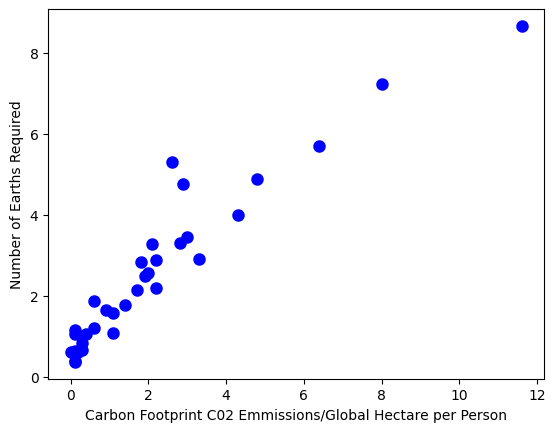

In [159]:
# Plot outputs
#plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test["Carbon Footprint"], y_pred, color="blue", linewidth=3)

plt.xlabel("Carbon Footprint C02 Emmissions/Global Hectare per Person")
plt.ylabel("Number of Earths Required")
#plt.xticks(())
#plt.yticks(())

plt.show()

In [160]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [163]:
X_train2 = X_train
X_train2 = sm.add_constant(X_train)    
est = sm.OLS(y_train, X_train2).fit()
est.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [171]:
#y_train.dtype
X_train2.dtypes

const                       float64
Life Exectancy               object
Population (millions)       float64
Cropland Footprint          float64
Grazing Footprint           float64
Forest Product Footprint    float64
Carbon Footprint            float64
Fish Footprint              float64
Built up land               float64
Cropland                    float64
Grazing land                float64
Forest land                 float64
Fishing ground              float64
Built up land.1             float64
Total biocapacity           float64
dtype: object

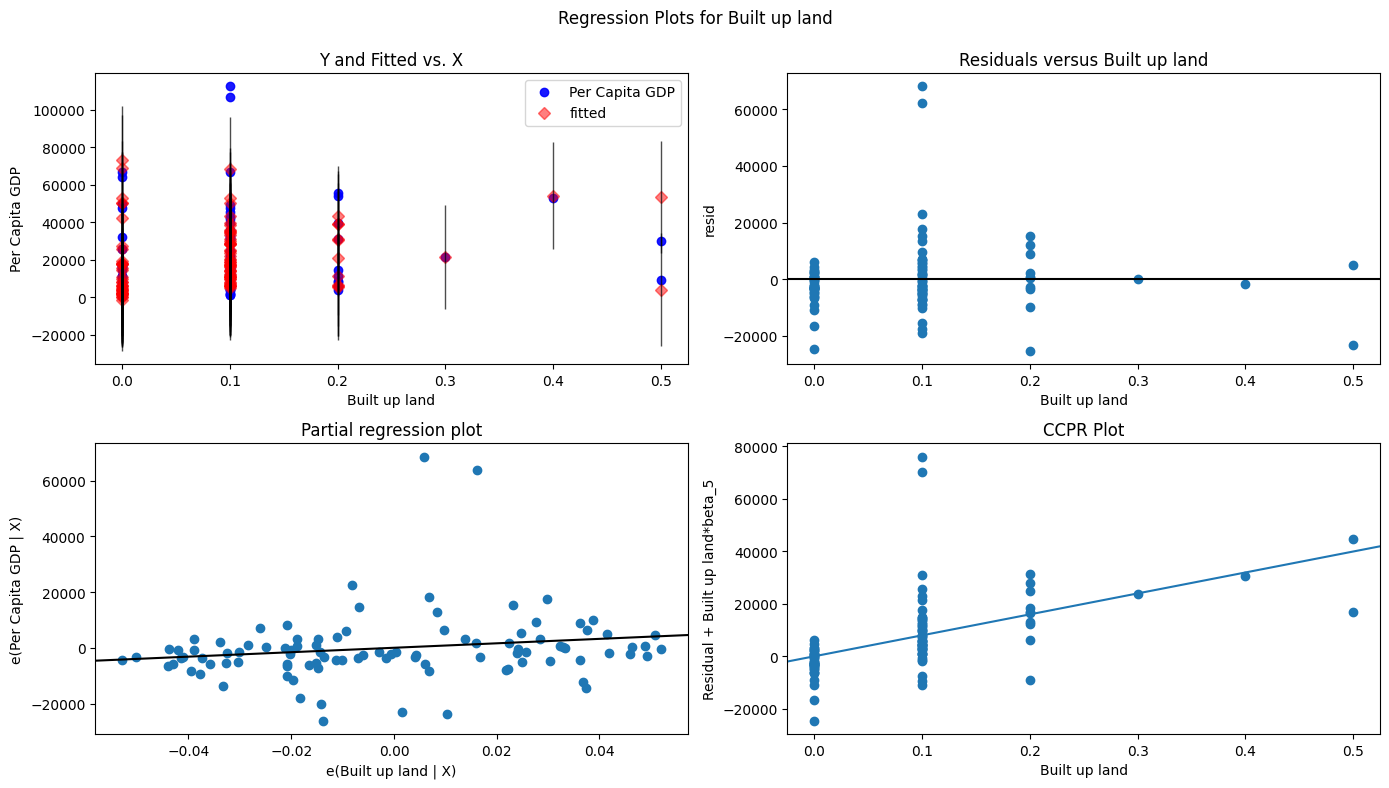

In [90]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(est, 'Built up land', fig=fig)